In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding

In [32]:
data = pd.read_csv('all-data.csv', encoding='latin-1')

In [33]:
data.head()

,Sentiment,News Data
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [34]:
data.describe()

,Sentiment,News Data
count,4846,4846
unique,3,4838
top,neutral,The report profiles 614 companies including ma...
freq,2879,2


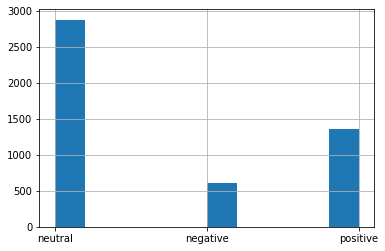

In [35]:
data[(data['Sentiment']=='neutral') | (data['Sentiment']=='positive') | (data['Sentiment']=='negative')]['Sentiment'].hist()


In [36]:
data['News Data']=data['News Data'].astype(str)

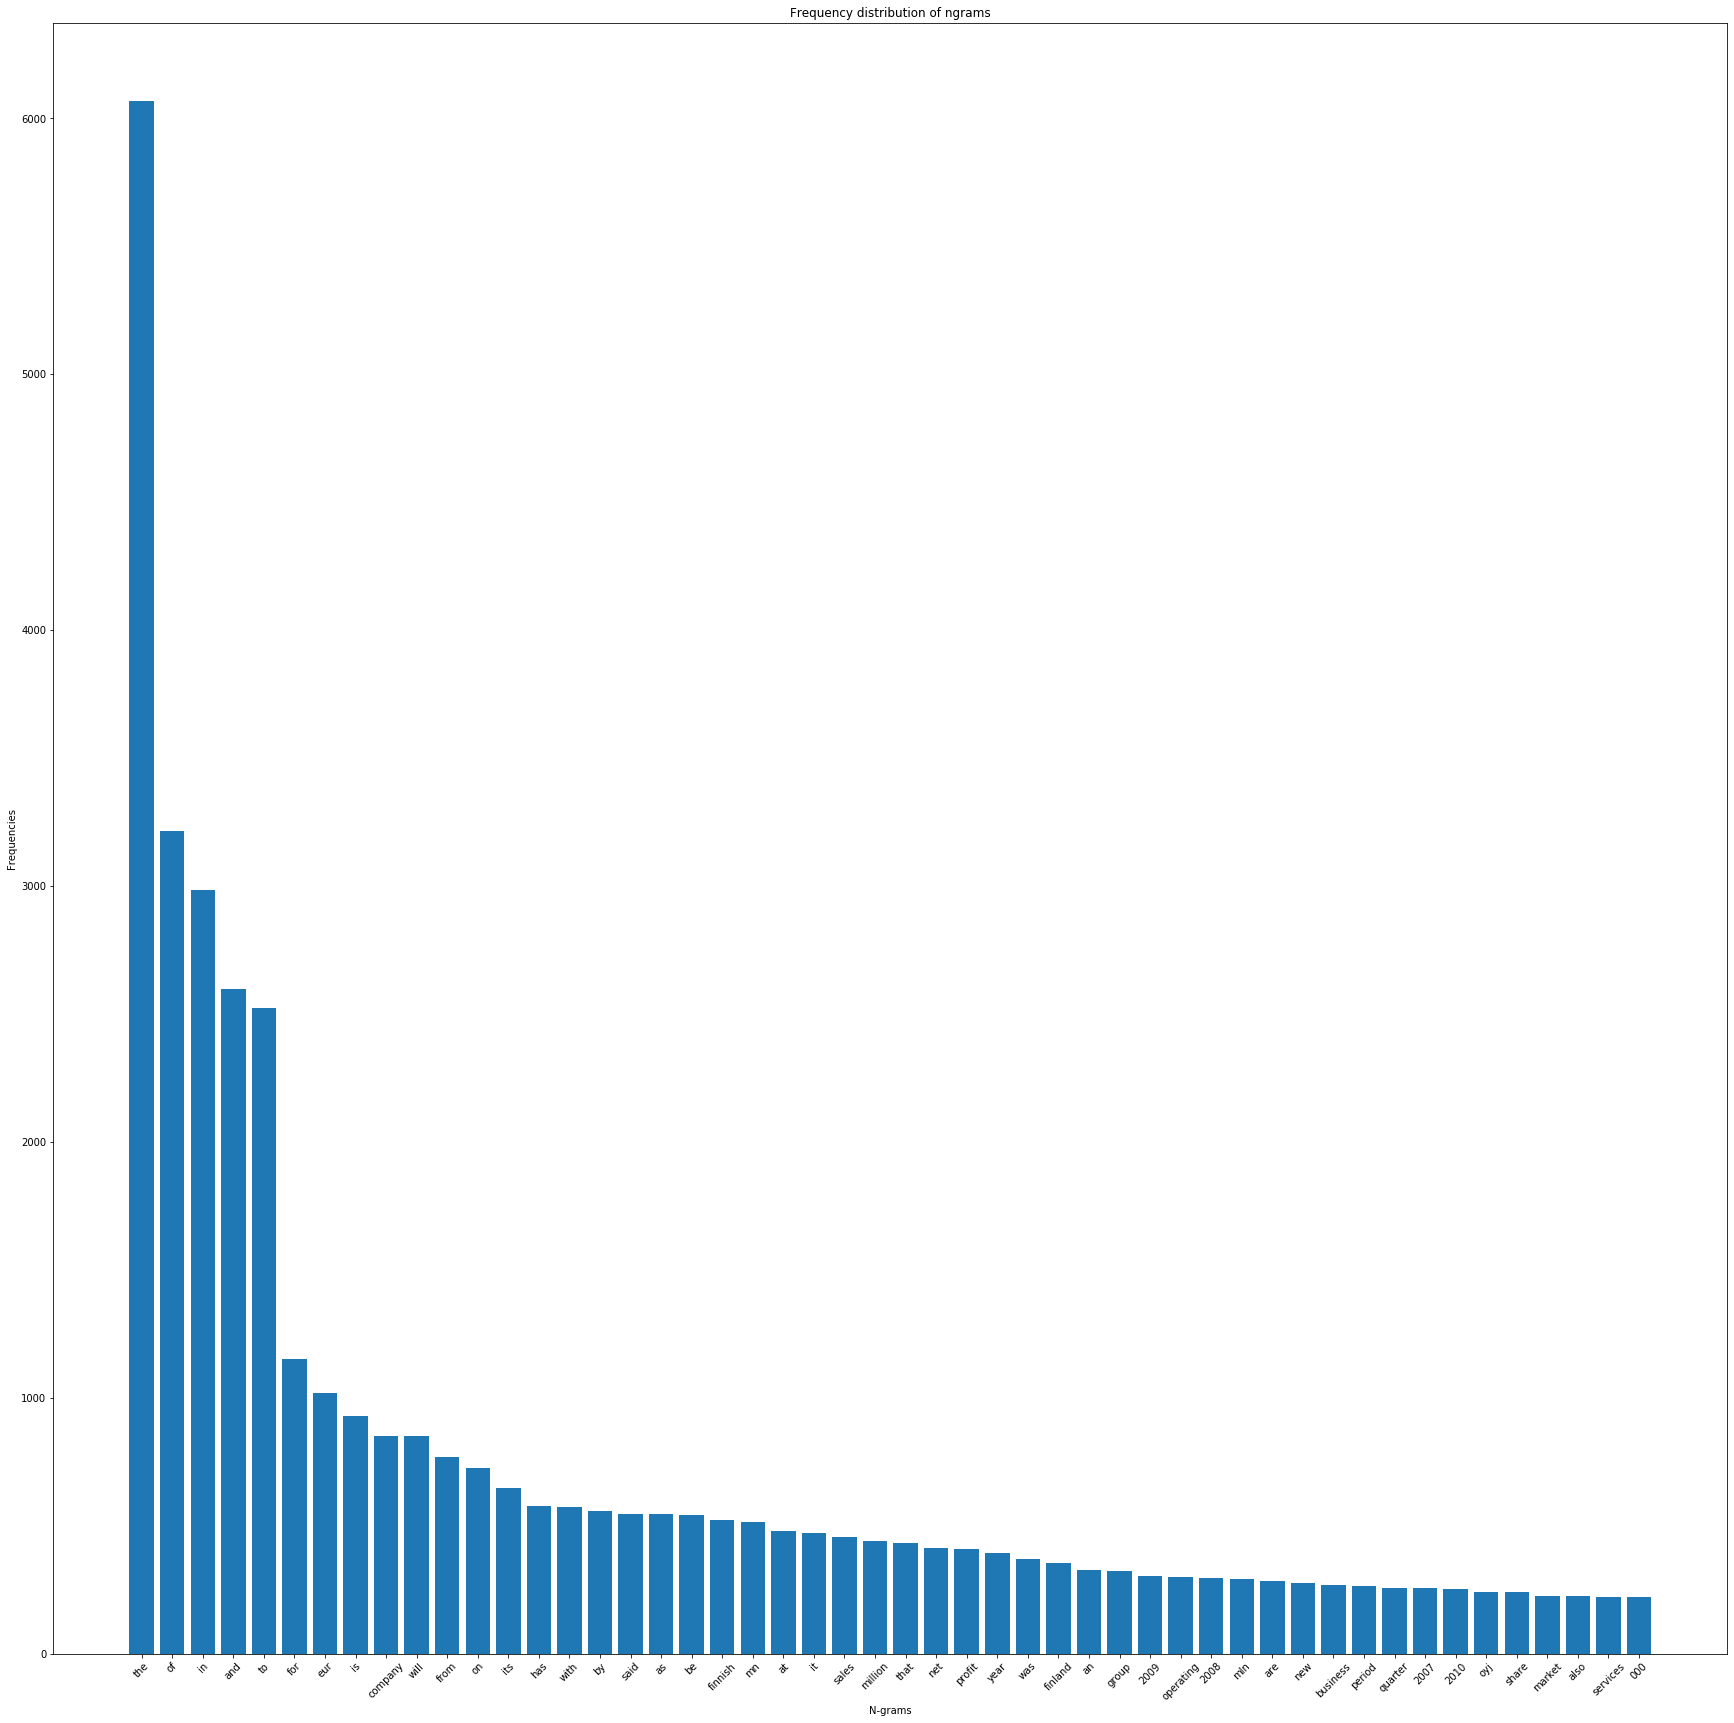

In [37]:
#plot graph that will show the frequency of words occuring in NewsData

vectorizer = CountVectorizer()
# So, we get such structure:
#        | word1  | word2  |  word3 | word4
# text1  |   1    |    1   |   1    |   0
# text2  |   0    |    1   |   1    |   0
# text3  |   2    |    1   |   0    |   0
# text4  |   0    |    0   |   0    |   1
vect_texts = vectorizer.fit_transform(list(data['News Data']))
# ['word1', 'word2', 'word3', 'word4']
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

In [38]:
label_encoder = preprocessing.LabelEncoder()
X = data['News Data']
y = label_encoder.fit_transform(data['Sentiment'])
X = X.astype(str)
X=X.to_numpy()
y=np.array(y)

In [39]:
training_sentences, training_labels =( X, y)

In [40]:
print(np.shape(training_sentences))

(4846,)


In [41]:
vocab_size=10000 
embedding_dim=16
max_length=60
trunc_type='post' # It can be changed to pre and then see the diffrence in accuracy
oov_tok='<OOV>'


In [42]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [43]:
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
print(sequences[0])

[95, 6, 3499, 2, 12, 17, 251, 337, 6, 656, 125, 89, 6, 151, 2797, 30, 11, 425, 2, 12, 11, 748]


In [44]:
print(training_sentences[0])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .


In [45]:
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

In [46]:
print(sequences[500])
print(padded[500])

[109, 3, 2, 2457, 4, 2, 241, 89, 4, 2, 368, 1194, 11, 1859, 3698, 30, 170, 5401, 5402, 5, 5403, 89]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  109    3    2 2457
    4    2  241   89    4    2  368 1194   11 1859 3698   30  170 5401
 5402    5 5403   89]


In [47]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'and': 5,
 'to': 6,
 'a': 7,
 'for': 8,
 'eur': 9,
 "'s": 10,
 'is': 11,
 'company': 12,
 'will': 13,
 'from': 14,
 'on': 15,
 'its': 16,
 'has': 17,
 'with': 18,
 'by': 19,
 'said': 20,
 'as': 21,
 'be': 22,
 'finnish': 23,
 'mn': 24,
 '1': 25,
 'at': 26,
 'it': 27,
 'sales': 28,
 'million': 29,
 'that': 30,
 'net': 31,
 'profit': 32,
 'year': 33,
 'was': 34,
 'm': 35,
 'finland': 36,
 '2': 37,
 '5': 38,
 '3': 39,
 'an': 40,
 'group': 41,
 '2009': 42,
 'operating': 43,
 '2008': 44,
 '4': 45,
 'mln': 46,
 '0': 47,
 'are': 48,
 'new': 49,
 'business': 50,
 'period': 51,
 'quarter': 52,
 '2007': 53,
 '2010': 54,
 '6': 55,
 'oyj': 56,
 'share': 57,
 '7': 58,
 '8': 59,
 'market': 60,
 '9': 61,
 'also': 62,
 'services': 63,
 '000': 64,
 'which': 65,
 'have': 66,
 "''": 67,
 'shares': 68,
 'first': 69,
 'this': 70,
 'up': 71,
 '2006': 72,
 'helsinki': 73,
 'been': 74,
 'euro': 75,
 'loss': 76,
 'about': 77,
 'compared': 78,
 'today': 79,
 'operati

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
from keras.utils import to_categorical
training_labels = to_categorical(training_labels)
model.summary()
training_labels.shape

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 16)            160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 172,955
Trainable params: 172,955
Non-trainable params: 0
_________________________________________________________________


(4846, 3)

In [50]:
num_epochs = 10
history=model.fit(padded,training_labels, epochs=num_epochs, batch_size =32)

Epoch 1/10
4846/4846 [==============================] - 8s 2ms/sample - loss: 0.9459 - acc: 0.5299
Epoch 2/10
4846/4846 [==============================] - 7s 1ms/sample - loss: 0.7599 - acc: 0.6141
Epoch 3/10
4846/4846 [==============================] - 7s 2ms/sample - loss: 0.5489 - acc: 0.7466
Epoch 4/10
4846/4846 [==============================] - 7s 2ms/sample - loss: 0.4024 - acc: 0.8260
Epoch 5/10
4846/4846 [==============================] - 8s 2ms/sample - loss: 0.2783 - acc: 0.9036
Epoch 6/10
4846/4846 [==============================] - 8s 2ms/sample - loss: 0.1752 - acc: 0.9445
Epoch 7/10
4846/4846 [==============================] - 9s 2ms/sample - loss: 0.1173 - acc: 0.9647
Epoch 8/10
4846/4846 [==============================] - 8s 2ms/sample - loss: 0.0939 - acc: 0.9734
Epoch 9/10
4846/4846 [==============================] - 7s 2ms/sample - loss: 0.0661 - acc: 0.9831
Epoch 10/10
4846/4846 [==============================] - 7s 2ms/sample - loss: 0.0537 - acc: 0.9864


In [51]:
newdata = pd.read_csv('NewNews.csv', encoding='latin-1')
newdata

,New News
0,Tesla: Big Upside
1,Tesla's Gigafactory 4 Is One Of Elon Musk's Sm...
2,Tesla Q4 Halftime Report
3,Tesla Bears Have 9 Lives
4,Tesla: An Analysis Of Demand In Established Ma...
...,...
1139,Will GM Beat Tesla To Market For An Electric P...
1140,"Energy Storage Can Drive Future Tesla Growth, ..."
1141,Tesla: Cash Is King
1142,Tesla Bears Hang On


In [52]:
sentence=newdata['New News']

In [53]:
sentence = sentence.astype(str)
sentence=sentence.to_numpy()


In [54]:
sos=[]
for i in range(0,sentence.size):
    s=sentence[i]
    sequence = tokenizer.texts_to_sequences([s])[0]
    sequence=pad_sequences([sequence],maxlen=60,padding='pre')
    k=model.predict_classes(sequence,verbose=0)
    if k==0:
        sos.append('negative')
    elif k==1:
        sos.append('neutral')
    else:
        sos.append('positive')

In [55]:
newdata['sentiment']=sos

In [56]:
sos

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neg

In [57]:
newdata
newdata['NEWSLABEL'] = label_encoder.fit_transform(newdata['sentiment'])
newdata

,New News,sentiment,NEWSLABEL
0,Tesla: Big Upside,neutral,1
1,Tesla's Gigafactory 4 Is One Of Elon Musk's Sm...,negative,0
2,Tesla Q4 Halftime Report,negative,0
3,Tesla Bears Have 9 Lives,negative,0
4,Tesla: An Analysis Of Demand In Established Ma...,positive,2
...,...,...,...
1139,Will GM Beat Tesla To Market For An Electric P...,negative,0
1140,"Energy Storage Can Drive Future Tesla Growth, ...",neutral,1
1141,Tesla: Cash Is King,neutral,1
1142,Tesla Bears Hang On,neutral,1


In [59]:
Rtdata = newdata[['NEWSLABEL']]
Rtdata.to_csv('SentimentFeature.csv')